In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import os 
import cv2
import dlib
from IPython.display import Image

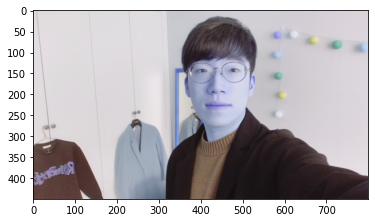

In [2]:
my_image_path = os.getenv('HOME')+'/aiffel/camera_sticker/images/image.png'
img_bgr = cv2.imread(my_image_path)    # OpenCVÎ°ú Ïù¥ÎØ∏ÏßÄÎ•º Î∂àÎü¨ÏòµÎãàÎã§
img_show = img_bgr.copy()      # Ï∂úÎ†•Ïö© Ïù¥ÎØ∏ÏßÄÎ•º Îî∞Î°ú Î≥¥Í¥ÄÌï©ÎãàÎã§
plt.imshow(img_bgr)
plt.show()

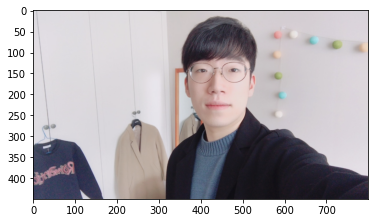

In [3]:
# plt.imshow Ïù¥Ï†ÑÏóê RGB Ïù¥ÎØ∏ÏßÄÎ°ú Î∞îÍæ∏Îäî Í≤ÉÏùÑ ÏûäÏßÄÎßàÏÑ∏Ïöî. 
# open cvÎäî rgb Í∞Ä ÏïÑÎãàÎùº bgr ÏàúÏÑúÎ°ú ÏÇ¨Ïö©ÌïòÍ∏∞Ïóê Î∞îÍæ∏Ïñ¥ Ï∂úÎ†•ÌïòÎ©¥ ÎêúÎã§. 
img_rgb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)
plt.imshow(img_rgb)
plt.show()

In [4]:
# detectorÎ•º ÏÑ†Ïñ∏Ìï©ÎãàÎã§
detector_hog = dlib.get_frontal_face_detector()
print("üå´üõ∏")

üå´üõ∏


In [5]:
img_rgb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)
dlib_rects = detector_hog(img_rgb, 1)   # (image, num of image pyramid)
print("üå´üõ∏")

üå´üõ∏


rectangles[[(345, 98) (531, 284)]]


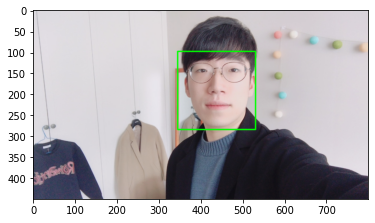

In [6]:
print(dlib_rects)   

for dlib_rect in dlib_rects:
    l = dlib_rect.left()
    t = dlib_rect.top()
    r = dlib_rect.right()
    b = dlib_rect.bottom()

    cv2.rectangle(img_show, (l,t), (r,b), (0,255,0), 2, lineType=cv2.LINE_AA)

img_show_rgb =  cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB)
plt.imshow(img_show_rgb)
plt.show()

In [7]:
model_path = os.getenv('HOME')+'/aiffel/camera_sticker/models/shape_predictor_68_face_landmarks.dat'
landmark_predictor = dlib.shape_predictor(model_path)
print("üå´üõ∏")

üå´üõ∏


In [8]:
list_landmarks = []

# ÏñºÍµ¥ ÏòÅÏó≠ Î∞ïÏä§ ÎßàÎã§ face landmarkÎ•º Ï∞æÏïÑÎÉÖÎãàÎã§
for dlib_rect in dlib_rects:
    points = landmark_predictor(img_rgb, dlib_rect)
    # face landmark Ï¢åÌëúÎ•º Ï†ÄÏû•Ìï¥Îë°ÎãàÎã§
    list_points = list(map(lambda p: (p.x, p.y), points.parts()))
    list_landmarks.append(list_points)

print(len(list_landmarks[0]))

68


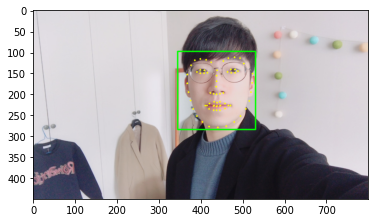

In [9]:
for landmark in list_landmarks:
    for point in landmark:
        cv2.circle(img_show, point, 2, (0, 255, 255), -1)

img_show_rgb = cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB)
plt.imshow(img_show_rgb)
plt.show()

In [10]:
for dlib_rect, landmark in zip(dlib_rects, list_landmarks):
    print (landmark[29]) # ÏΩîÏùò indexÎäî 30 ÏûÖÎãàÎã§
    x = landmark[29][0]
    y = landmark[29][1] - dlib_rect.height()//2
    w = h = dlib_rect.width()
    print ('(x,y) : (%d,%d)'%(x,y))
    print ('(w,h) : (%d,%d)'%(w,h))

(438, 169)
(x,y) : (438,76)
(w,h) : (187,187)


In [11]:
sticker_path = os.getenv('HOME')+'/aiffel/camera_sticker/images/king.png'
img_sticker = cv2.imread(sticker_path) # Ïä§Ìã∞Ïª§ Ïù¥ÎØ∏ÏßÄÎ•º Î∂àÎü¨ÏòµÎãàÎã§
img_sticker = cv2.resize(img_sticker, (w,h))
print (img_sticker.shape)

(187, 187, 3)


In [12]:
refined_x = x - w // 2
refined_y = y - h
print ('(x,y) : (%d,%d)'%(refined_x, refined_y)) 
#Ï∂úÎ†•ÎêòÎäî ÏùåÏàòÎäî Ïä§ÌéòÏù¥Ïä§ Î∞ñÏù¥Í∏∞Ïóê 

(x,y) : (345,-111)


In [13]:
if refined_x < 0: 
    img_sticker = img_sticker[:, -refined_x:]
    refined_x = 0
if refined_y < 0:
    img_sticker = img_sticker[-refined_y:, :]
    refined_y = 0
#ÏùåÏàò ÌÅ¨Í∏∞ÎßåÌÅº Ïä§Ìã∞Ïª§Î•º cropÌïúÌõÑ x,y Ï¢åÌëúÎ•º Í≤ΩÏö∞Ïóê ÎßûÏ∂∞ Ïù¥ÎØ∏ÏßÄ Í≤ΩÍ≥ÑÍ∞íÏúºÎ°ú ÏàòÏ†ï.
print ('(x,y) : (%d,%d)'%(refined_x, refined_y))

(x,y) : (345,0)


In [14]:
sticker_area = img_show[refined_y:refined_y+img_sticker.shape[0], refined_x:refined_x+img_sticker.shape[1]]
img_show[refined_y:refined_y+img_sticker.shape[0], refined_x:refined_x+img_sticker.shape[1]] = \
    np.where(img_sticker==0,sticker_area,img_sticker).astype(np.uint8)
print("Ïäù~")

Ïäù~


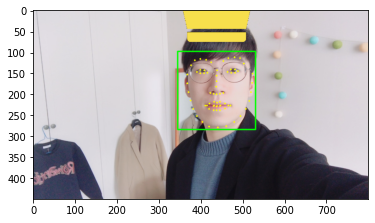

In [15]:
plt.imshow(cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB))
plt.show()

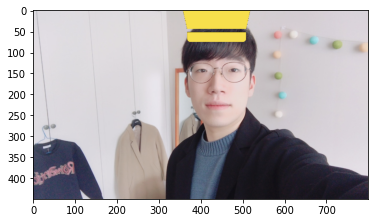

In [16]:
sticker_area = img_bgr[refined_y:refined_y +img_sticker.shape[0], refined_x:refined_x+img_sticker.shape[1]]
img_bgr[refined_y:refined_y +img_sticker.shape[0], refined_x:refined_x+img_sticker.shape[1]] = \
    np.where(img_sticker==0,sticker_area,img_sticker).astype(np.uint8)
plt.imshow(cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB))
plt.show()

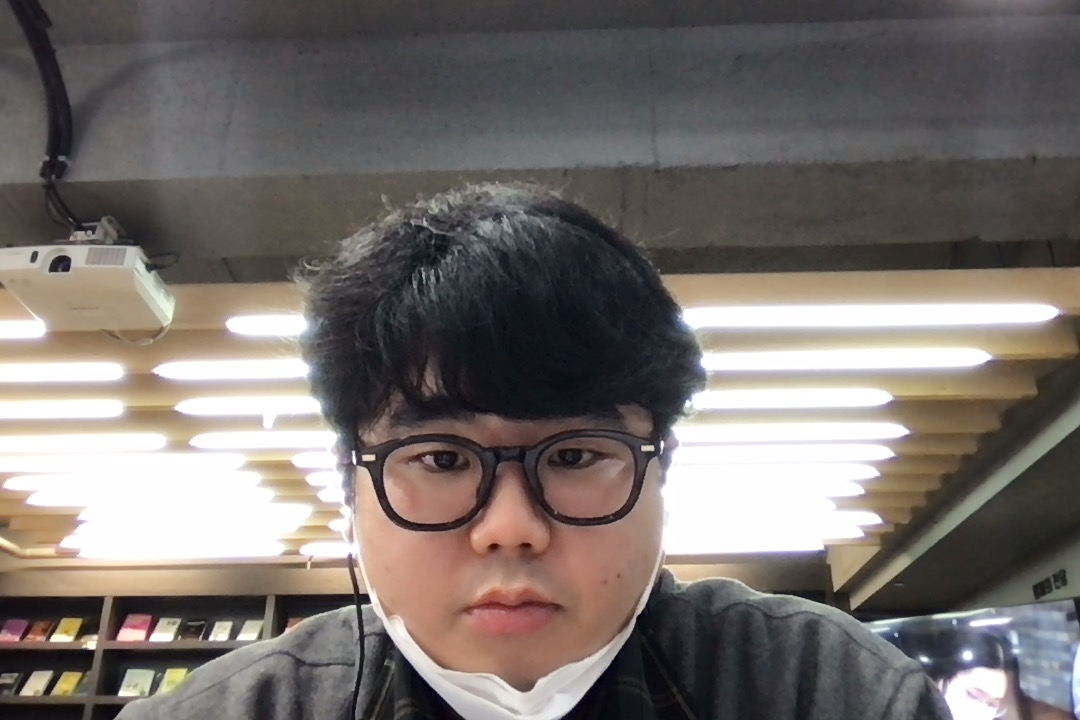

In [17]:
Image(os.getcwd()+'/camera_sticker/images/me.jpg')

In [18]:
my_image_path = os.getcwd()+'/camera_sticker/images/me.jpg'
img_bgr = cv2.imread(my_image_path)  
img_show = img_bgr.copy()
img_rgb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)
plt.imshow(img_rgb)
plt.show()

In [19]:
detector_face = dlib.get_frontal_face_detector()
img_rgb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)
dlib_rects = detector_face(img_rgb, 1)

print(dlib_rects)   

for dlib_rect in dlib_rects:
    l = dlib_rect.left()
    t = dlib_rect.top()
    r = dlib_rect.right()
    b = dlib_rect.bottom()

    cv2.rectangle(img_show, (l,t), (r,b), (0,255,0), 2, lineType=cv2.LINE_AA)

img_show_rgb =  cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB)
plt.imshow(img_show_rgb)
plt.show()

rectangles[[(348, 384) (669, 705)]]


In [20]:
model_path = os.getenv('HOME')+'/aiffel/camera_sticker/models/shape_predictor_68_face_landmarks.dat'
landmark_predictor = dlib.shape_predictor(model_path)
#landmark Ï∞æÍ∏∞
list_landmarks = []

for dlib_rect in dlib_rects:
    points = landmark_predictor(img_rgb, dlib_rect)
    
    list_points = list(map(lambda p: (p.x, p.y), points.parts())) #ÎûåÎã§Ìï®Ïàò
    list_landmarks.append(list_points)

print(len(list_landmarks[0]))
#landmark print
for landmark in list_landmarks:
    for point in landmark:
        cv2.circle(img_show, point, 2, (0, 255, 255), -1)

img_show_rgb = cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB)
plt.imshow(img_show_rgb)
plt.show()

68


In [21]:
for dlib_rect, landmark in zip(dlib_rects, list_landmarks):
    print (landmark[33]) # ÏΩîÏùò indexÎäî 30 ÏûÖÎãàÎã§
    x = landmark[33][0]
    y = landmark[33][1] - dlib_rect.height()//2
    w = h = dlib_rect.width()
    print ('ÏΩî ÎÅùÏúÑÏπò 33Î≤à (x,y) : (%d,%d)'%(x,y))
    print ('ÏàòÏóº (w,h) : (%d,%d)'%(w,h))

(510, 562)
ÏΩî ÎÅùÏúÑÏπò 33Î≤à (x,y) : (510,401)
ÏàòÏóº (w,h) : (322,322)


Ïä§Ìã∞Ïª§ ÏÇ¨Ïù¥Ï¶à: (322, 322, 3)

Ïä§Ìã∞Ïª§ Ï¢åÌëú: (x,y) : (349,380)


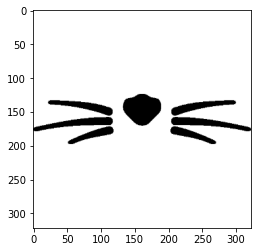

In [22]:
sticker_path = os.getcwd()+'/camera_sticker/images/cat-whiskers.png'
img_sticker = cv2.imread(sticker_path) # Ïä§Ìã∞Ïª§ Ïù¥ÎØ∏ÏßÄÎ•º Î∂àÎü¨ÏòµÎãàÎã§
img_sticker = cv2.resize(img_sticker, (w,h))
plt.imshow(img_sticker)

print ('Ïä§Ìã∞Ïª§ ÏÇ¨Ïù¥Ï¶à:',img_sticker.shape)
print()

refined_x = x - w // 2
refined_y = y - h // 15
print ('Ïä§Ìã∞Ïª§ Ï¢åÌëú: (x,y) : (%d,%d)'%(refined_x, refined_y))

In [23]:
#Ïù¥Í±¥ ÏùåÏàòÎ°ú Ï¢åÌëú Ï∞çÌòÄ Ï°∞Ï†à Ìï¥Ïïº Îê†Îïå ÏÇ¨Ïö©
if refined_x < 0: 
    img_sticker = img_sticker[:, -refined_x:]
    refined_x = 0
if refined_y < 0:
    img_sticker = img_sticker[-refined_y:, :]
    refined_y = 0

print ('(x,y) : (%d,%d)'%(refined_x, refined_y))

(x,y) : (349,380)


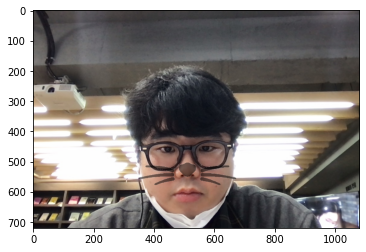

In [24]:
sticker_area = img_bgr[refined_y:refined_y+img_sticker.shape[0], refined_x:refined_x+img_sticker.shape[1]]
img_bgr[refined_y:refined_y+img_sticker.shape[0], refined_x:refined_x+img_sticker.shape[1]] = \
    cv2.addWeighted(sticker_area, 0.5, np.where(img_sticker==255,sticker_area,img_sticker).astype(np.uint8), 0.5, 0)
plt.imshow(cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB))
plt.show()